<a href="https://colab.research.google.com/github/krannberry/astr-19/blob/main/Final_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
! pip install sep astropy

In [160]:
# additional setup for reading the test image and displaying plots
import numpy as np
import sep
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

In [161]:
# URL of the FITS file
fits_url = 'https://raw.githubusercontent.com/kbarbary/sep/v1.0.x/data/image.fits'

# Open the FITS file
hdul = fits.open(fits_url)

# Extract the image data from the primary HDU
image_data = hdul[0].data


ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992               
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC      
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD      
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD      


In [162]:
# Measure Background
bkg = sep.Background(image_data)

# Subtract the background
data_sub = image_data - bkg

# Detect objects
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)



In [163]:
fits.info(image_file)

Filename: /root/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [164]:
data = fits.getdata(image_file, ext=0)

In [165]:
# Print the Data
print(data.shape)

(893, 891)


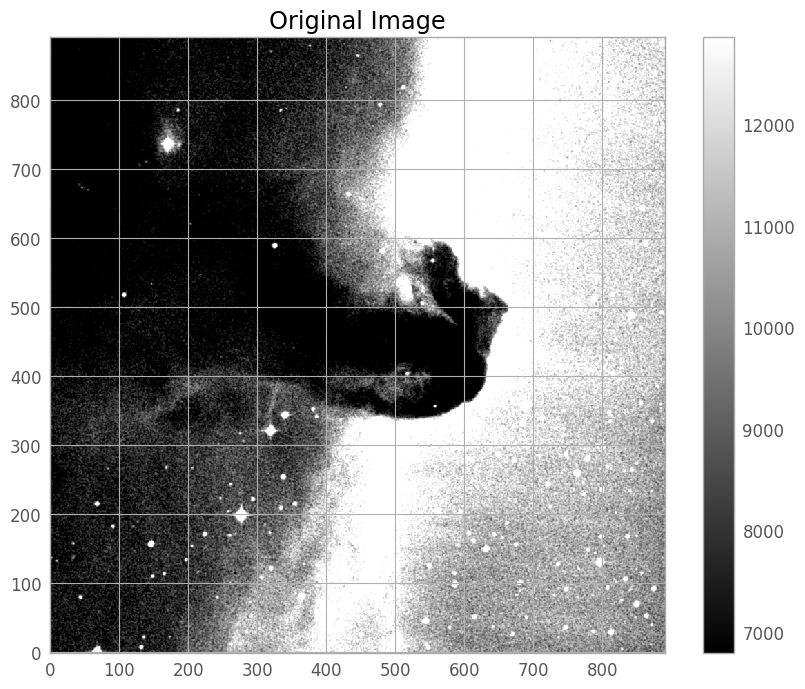

In [166]:
plt.figure()
# show and save the image
plt.title('Original Image')
plt.savefig('original_image.png')  # Save the figure
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [167]:
# Measure background
bkg = sep.Background(image_data)

# Subtract the background
data_sub = image_data - bkg

# Detect objects
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [168]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [169]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

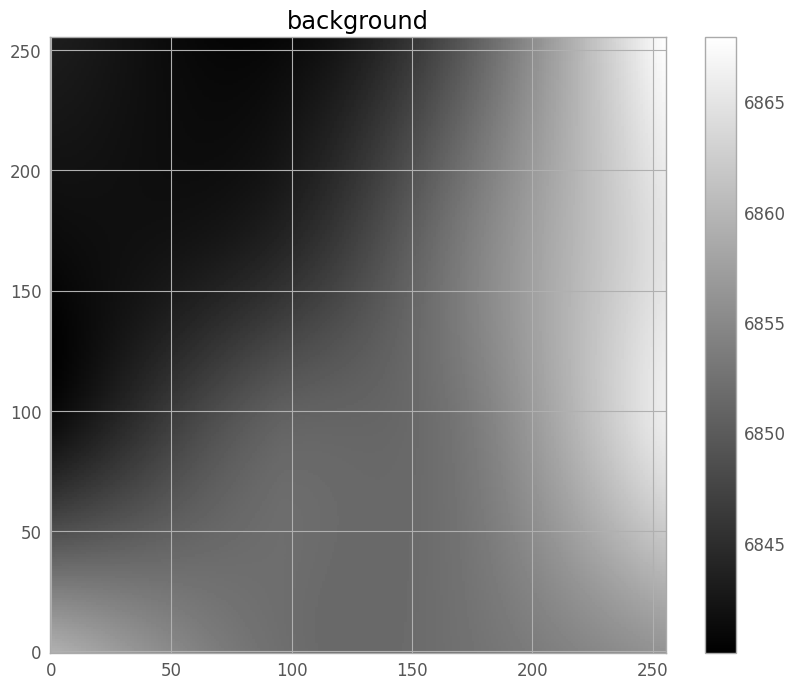

In [170]:
# show and save the background
plt.title('background')
plt.savefig('background.png')  # Save the figure
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [171]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

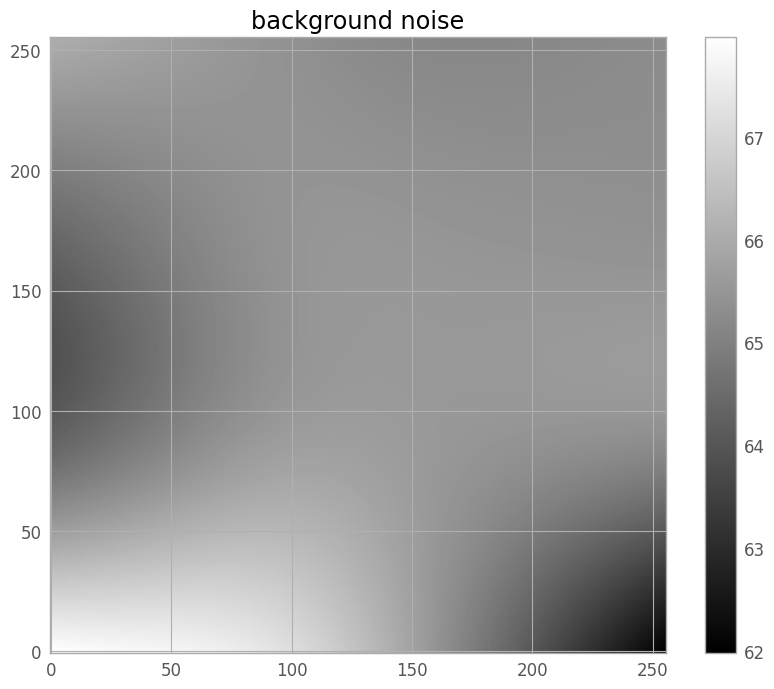

In [172]:
# show and save the background noise
plt.title('background noise')
plt.savefig('background_noise.png')  # Save the figure
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();


In [173]:
# Detect objects
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)


In [174]:
# how many objects were detected
len(objects)

69

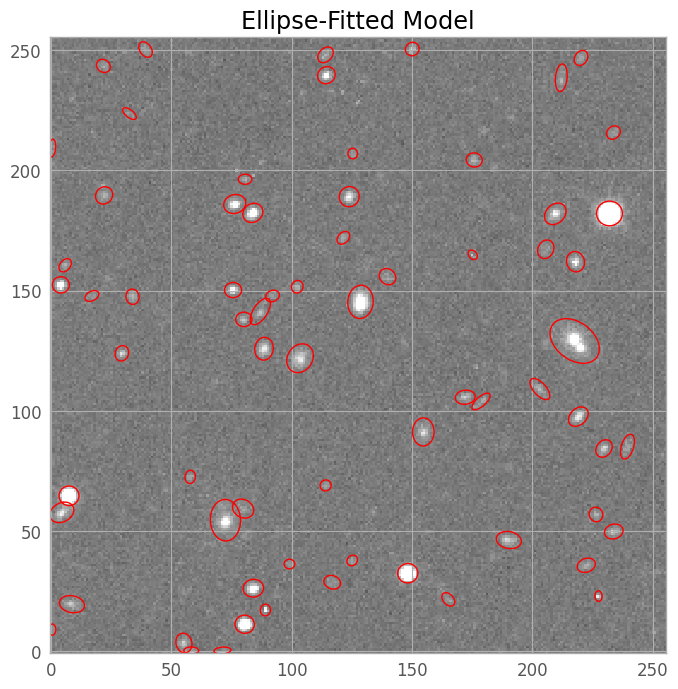

In [175]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.title('Ellipse-Fitted Model')
plt.savefig('ellipse_fitted_model.png')  # Save the figure

In [176]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [177]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [178]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138


In [179]:
# URL of the FITS file
fits_url = 'https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits'

# Open the FITS file
hdul = fits.open(fits_url)

# Extract the image data from the primary HDU
image_data = hdul[0].data


In [180]:
# Adjust the byte order
if image_data.dtype.byteorder not in ('=', '|'):
    image_data = image_data.byteswap().newbyteorder()

In [181]:
# Measure background
bkg = sep.Background(image_data)

# Subtract the background
data_sub = image_data - bkg

# Detect objects
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)


In [182]:
fits.info(image_file)

Filename: /root/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [183]:
data = fits.getdata(image_file, ext=0)

In [184]:
# Print the Data
print(data.shape)

(893, 891)


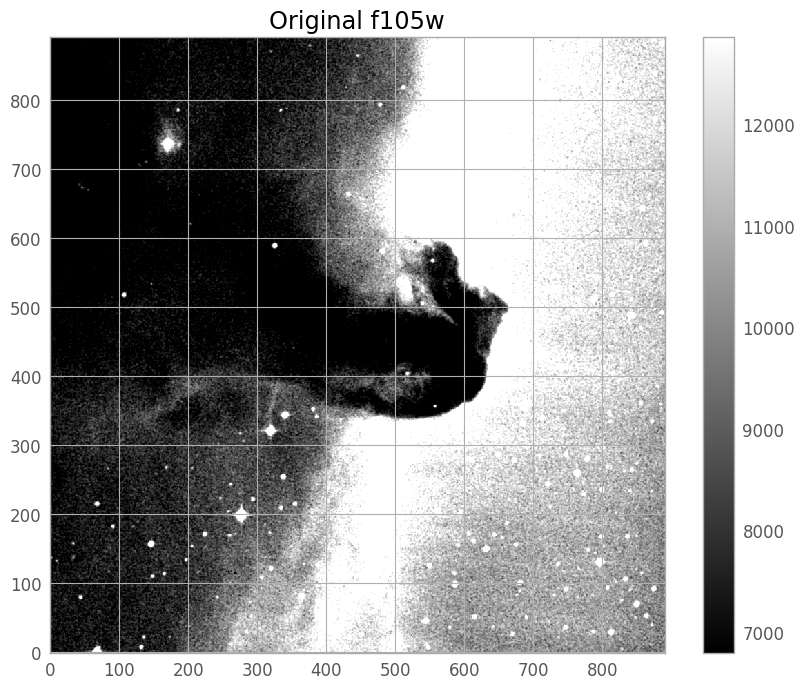

In [185]:
plt.figure()
# show and save the image
plt.title('Original f105w')
plt.savefig('original_f105w.png')  # Save the figure
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [186]:
# Measure background
bkg = sep.Background(image_data)

# Subtract the background
data_sub = image_data - bkg

# Detect objects
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [187]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)


0.0
0.0005398219218477607


In [188]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()

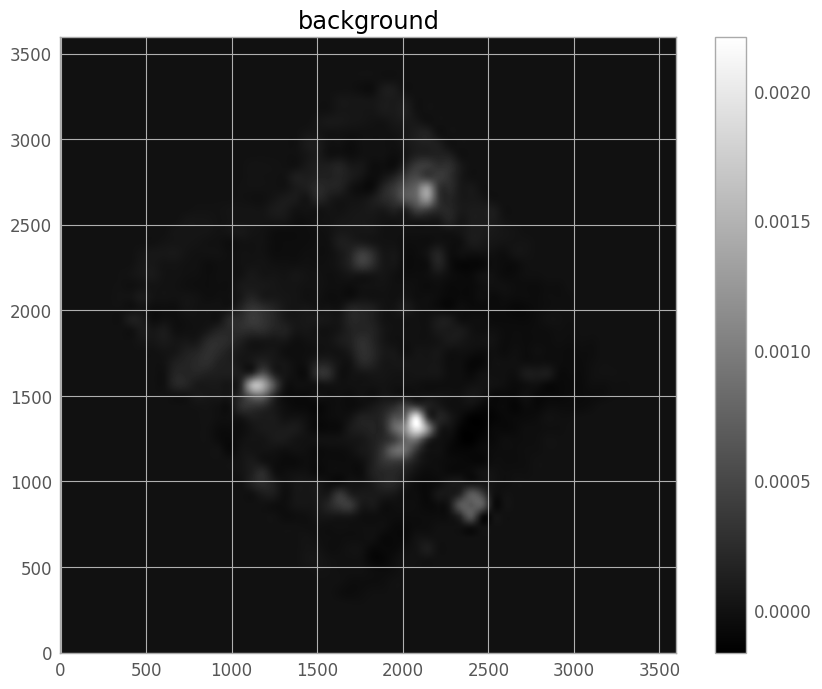

In [189]:
# show and save the background
plt.title('background')
plt.savefig('background.png')  # Save the figure
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();


In [190]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

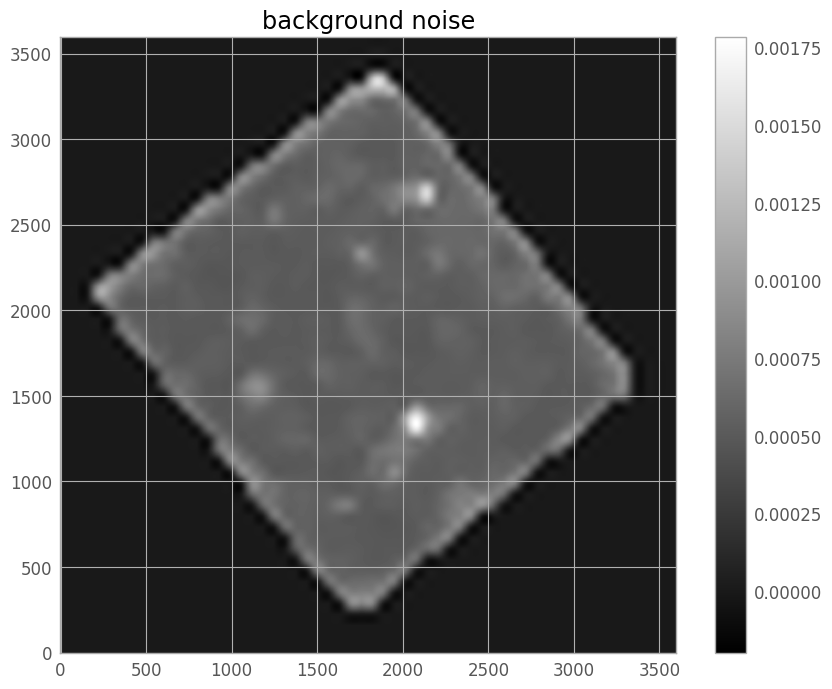

In [191]:
# show and save the background noise
plt.title('background noise')
plt.savefig('background_noise.png')  # Save the figure
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [192]:
# Detect objects
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [193]:
# how many objects were detected
len(objects)

8643

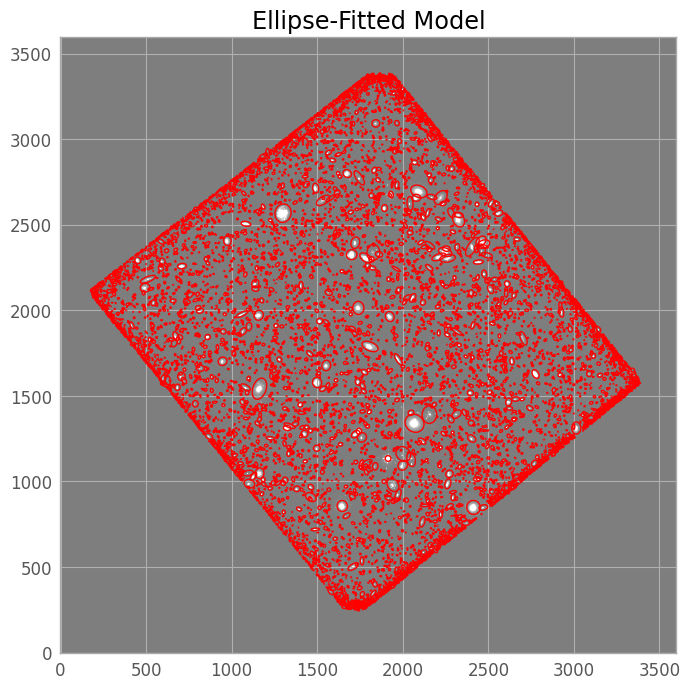

In [194]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.title('Ellipse-Fitted Model')
plt.savefig('ellipse_fitted_model.png')  # Save the figure

In [195]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [196]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)



In [197]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))



object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


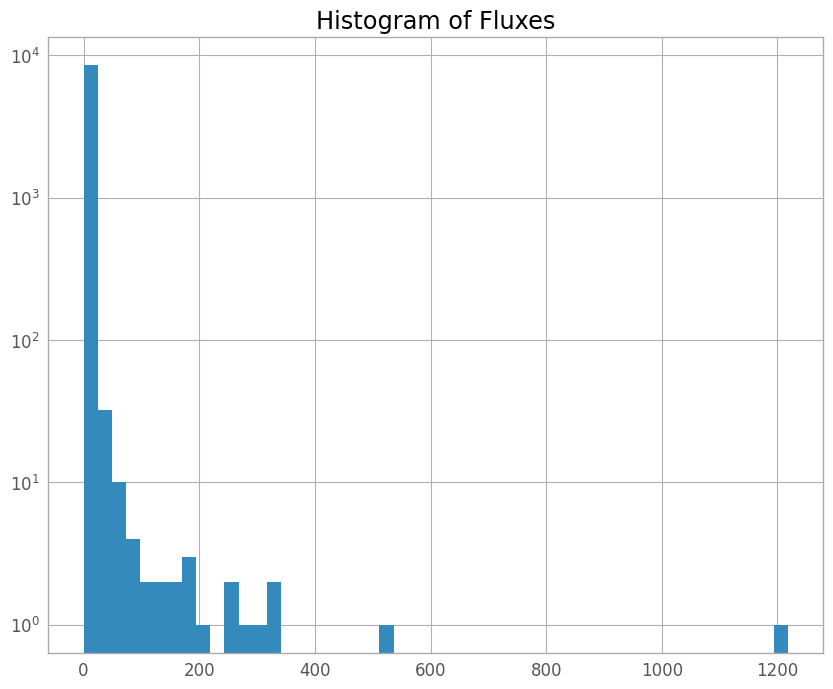

In [198]:
# Histogram of fluxes
fluxes= objects['flux']
plt.hist(fluxes, bins=50, log=True)
plt.title('Histogram of Fluxes')
plt.show()

In [199]:
# Calculate mean, median, and standard deviation
mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes)
std_flux = np.std(fluxes)

print(f'Mean: {mean_flux}')
print(f'Median: {median_flux}')
print(f'Standard Deviation: {std_flux}')

Mean: 1.17227448026878
Median: 0.0347491130232811
Standard Deviation: 17.542063555658334


In [200]:
# URL of the FITS file
fits_url = 'https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits'

# Open the FITS file
hdul = fits.open(fits_url)

# Extract the image data from the primary HDU
image_data = hdul[0].data


In [201]:
fits.info(image_file)

Filename: /root/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [202]:
data = fits.getdata(image_file, ext=0)

In [203]:
# URL of the FITS file
fits_url = 'https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits'

# Open the FITS file
hdul = fits.open(fits_url)

# Extract the image data from the primary HDU
image_data = hdul[0].data


In [204]:
fits.info(image_file)

Filename: /root/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [205]:
data = fits.getdata(image_file, ext=0)

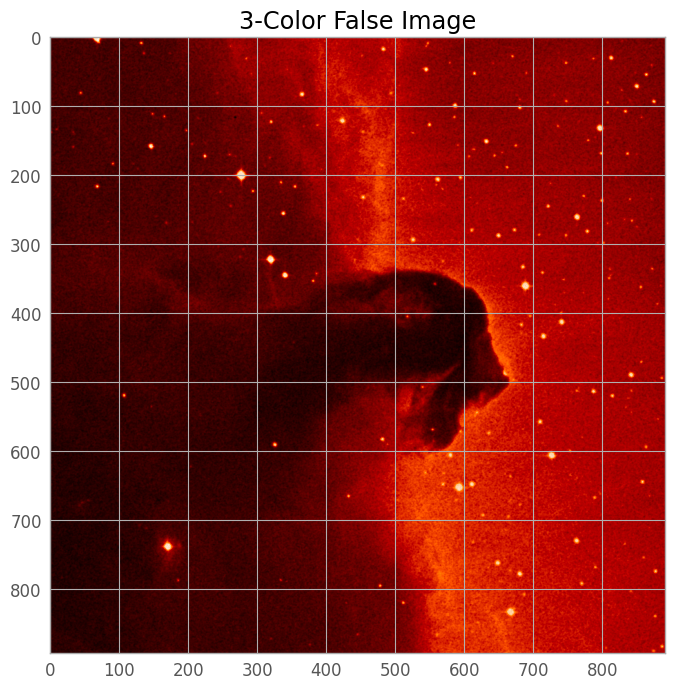

In [206]:
# Save the 3-color false image as a PNG
plt.imshow(data, origin='upper')
plt.title('3-Color False Image')
plt.savefig('3_color_false_image.png')
plt.show()